## **YOLO**

Tutorial Link: https://www.youtube.com/watch?v=m9fH9OWn8YM

GitHub Repository: https://github.com/ultralytics/ultralytics

As previously mentioned, we will be utilizing the Airbus Aircraft database, which features high-resolution satellite images, each measuring 2560x2560 pixels.

However, according to the documentation on the YOLO library's GitHub page, the latest models in this library are not capable of processing images larger than 640 pixels. Consequently, in this section of our project, we have decided to divide the image in subimages, i.e., instead of having one picture of 2560x2560 there is gonna be 25 subimages of 512x512 pixels.

As we are using the YOLO files, we do not only need to make the image divisionwe also need to prepare the files for those subimages.

There are many versions of YOLO, but we will focus on YOLOv8, which are the latest versions offered. Additionally, within YOLOv8, there are several models that have been pre-trained for Detection, Segmentation, and Pose with different databases. Among the different databases used, it's worth highlighting COCO (Common Objects in Context), Open Image V7 (with Google Images), and ImageNet, each of which includes labeled images [6].
Focusing exclusively on YOLOv8 pre-trained with COCO, we need to choose a model size that is suitable for the problem at hand. The following table shows a summary of the main characteristics of the different models. Notable features include the pixel size that the model supports, params which is the number of parameters the model has in millions (a higher number of parameters can be more complex and effective, but slower), and lastly FLOPs (Floating Point Operations Per Second) representing the model's complexity.


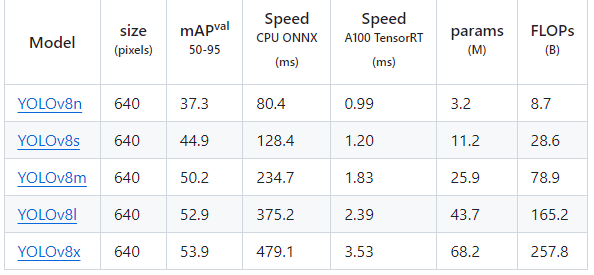

YOLO = You only see once

COCO = Common Objects in Context

# **Installation Libraries**

In [1]:
!pip install torchsummary
!pip install torchmetrics
!pip install torchvision
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 22.6 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 16.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 14.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling triton-2.1.0:
      Successfully uninstalled triton-2.1.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.18.1
    Uninstalling nvidia-nccl-cu12-2.18.1:
      Successfully uninstalled nvidia-nccl-cu12-2.18.1
  Attempting u

In [2]:
!pip install ultralytics
!pip install fxpmath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fxpmath: filename=fxpmath-0.4.9-py3-none-any.whl size=35223 sha256=a3d5138ff39179c8b53b5ec63f4fd9a00402a70c7f40d9bcdfbec829974c414c
  Stored in directory: /tmp/pip-ephem-wheel-cache-r5un0gv_/wheels/4a/75/f7/65a895cb07af2c0c9590a063373ade5b7215f26198c3704574
Successfully built fxpmath


In [2]:
from PIL import Image
import os

Se puede escoger el modelo con el que queremos entrenar el modelo

# **Train and Test Model**


## Train the model

Para el entrenamiento de este modelo también hay que seleccionar en el fichero config.py el dataset utiizar y el backbone de yolov8n

We need to select a YOLO model to train our data.

In this project we selected the yolov8n, as it had provided the best results to this data. There is the need to point it out, that this model is a pretrained model, hence, it will may probably improve the  model.

In [3]:
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import os
path = os.getcwd()

In [4]:
model = YOLO('yolov8n.pt')
results = model.train(data = path+ '/Datasets/Airbus_640/Airbus_640.yaml', epochs = 10,  imgsz=640, save = True, val = True)

Ultralytics YOLOv8.2.38 🚀 Python-3.11.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-PCIE-40GB MIG 7g.40gb, 40338MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jovyan/Carlos_Gonzalez/YOLO/Datasets/Airbus_640/Airbus_640.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

train: Scanning /home/jovyan/Carlos_Gonzalez/YOLO/Datasets/Airbus_640/labels/train... 2230 images, 429 backgrounds, 0 corrupt: 100%|██████████| 2230/2230 [00:02<00:00, 1063.61it/s]


train: New cache created: /home/jovyan/Carlos_Gonzalez/YOLO/Datasets/Airbus_640/labels/train.cache


val: Scanning /home/jovyan/Carlos_Gonzalez/YOLO/Datasets/Airbus_640/labels/train.cache... 2230 images, 429 backgrounds, 0 corrupt: 100%|██████████| 2230/2230 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.4G      1.329      1.605      1.205         18        640: 100%|██████████| 140/140 [00:12<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.35it/s]


                   all       2230       6534      0.901      0.843      0.922      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.42G      1.248      1.025       1.19         30        640: 100%|██████████| 140/140 [00:10<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 10.76it/s]


                   all       2230       6534      0.932      0.941      0.971      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.43G      1.196     0.8293      1.154          9        640: 100%|██████████| 140/140 [00:10<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 10.93it/s]


                   all       2230       6534      0.933      0.947      0.975      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.41G       1.16     0.7223      1.145         12        640: 100%|██████████| 140/140 [00:09<00:00, 14.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.31it/s]

                   all       2230       6534      0.942      0.939      0.972      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.4G      1.109     0.6609      1.121         12        640: 100%|██████████| 140/140 [00:10<00:00, 13.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.35it/s]

                   all       2230       6534      0.949      0.958      0.983      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.41G      1.103     0.6108      1.123         19        640: 100%|██████████| 140/140 [00:09<00:00, 14.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.49it/s]

                   all       2230       6534      0.953      0.964      0.987       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.4G      1.051     0.5696      1.094         14        640: 100%|██████████| 140/140 [00:10<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 10.33it/s]

                   all       2230       6534      0.954      0.967      0.988      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.4G      1.023     0.5322      1.075         25        640: 100%|██████████| 140/140 [00:10<00:00, 13.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.82it/s]

                   all       2230       6534      0.958      0.969      0.988      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.4G     0.9812     0.5018      1.067         28        640: 100%|██████████| 140/140 [00:10<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.59it/s]

                   all       2230       6534      0.958      0.973      0.988      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.4G     0.9531     0.4752      1.043         22        640: 100%|██████████| 140/140 [00:09<00:00, 14.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:05<00:00, 11.75it/s]

                   all       2230       6534      0.955      0.979      0.989      0.781



10 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.38 🚀 Python-3.11.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-PCIE-40GB MIG 7g.40gb, 40338MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.49it/s]


                   all       2230       6534      0.955      0.979      0.989      0.781
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train2


In [7]:
summary_results = pd.read_csv('runs/detect/train2/results.csv')

In [8]:
summary_results

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.32880,1.60470,1.2053,0.90090,0.84343,0.92224,0.57815,1.30690,1.16010,1.14720,0.000662,0.000662,0.000662
1,2,1.24810,1.02540,1.1903,0.93163,0.94056,0.97082,0.64929,1.13410,0.70472,1.12270,0.001197,0.001197,0.001197
2,3,1.19610,0.82927,1.1536,0.93302,0.94705,0.97472,0.67167,1.12430,0.63026,1.09460,0.001600,0.001600,0.001600
3,4,1.16050,0.72231,1.1452,0.94166,0.93875,0.97214,0.68389,1.10100,0.56432,1.08270,0.001406,0.001406,0.001406
4,5,1.10940,0.66092,1.1208,0.94862,0.95807,0.98311,0.71499,1.02910,0.52318,1.05110,0.001208,0.001208,0.001208
5,6,1.10270,0.61080,1.1232,0.95296,0.96388,0.98707,0.74049,0.97814,0.47613,1.02480,0.001010,0.001010,0.001010
6,7,1.05070,0.56961,1.0943,0.95439,0.96679,0.98776,0.74477,0.95222,0.46041,1.00840,0.000812,0.000812,0.000812
7,8,1.02320,0.53223,1.0753,0.95809,0.96904,0.98780,0.75344,0.91583,0.42758,1.00670,0.000614,0.000614,0.000614
8,9,0.98124,0.50184,1.0666,0.95792,0.97260,0.98787,0.76203,0.91115,0.41973,1.00600,0.000416,0.000416,0.000416
9,10,0.95308,0.47523,1.0428,0.95529,0.97903,0.98892,0.78053,0.86786,0.39202,0.97552,0.000218,0.000218,0.000218


In [9]:
mAP50 = summary_results.iloc[:,6]
mAP50_95 = summary_results.iloc[:,7]

In [10]:
max_mAP_index = np.argmax(mAP50)
max_mAP_value = mAP50[max_mAP_index]

mAP50_95_index = np.argmax(mAP50_95)
mAP50_95_value = mAP50[mAP50_95_index]

In [11]:
# Plot num_epochs vs. mAP@50
plt.figure(figsize=(10, 6))
plt.plot(range(0,len(mAP50)), mAP50, linestyle='-', color='r')
plt.plot(max_mAP_index, max_mAP_value, 'go')
plt.title("mAP@50")
plt.legend(["Valid", f"Best mAP@50: {max_mAP_value:.2f}"])
plt.xlabel("Number of Epochs")
plt.ylabel("mAP@50")
plt.grid(True)
plt.savefig("runs/detect/train2/epochs_vs_mAP50.png")
plt.close()

# Plot num_epochs vs. mAP@50
plt.figure(figsize=(10, 6))
plt.plot(range(0,len(mAP50_95)), mAP50_95, linestyle='-', color='r')
plt.plot(mAP50_95_index, mAP50_95_value, 'go')
plt.title("mAP@50")
plt.legend(["Valid", f"Best mAP@50: {max_mAP_value:.2f}"])
plt.xlabel("Number of Epochs")
plt.ylabel("Avg mAP50-95")
plt.grid(True)
plt.savefig("runs/detect/train2/epochs_vs_mAP50_95.png")
plt.close()

# Predict

In [3]:
from test_best_model_yolov8n import test_prediction
# test_prediction(tile_size = 256, overlap = 0.2, threshold=0.4, iou_threshold=0.4)
test_prediction(tile_size = 640, overlap = 0.2, threshold=0.4, iou_threshold=0.4)
test_prediction(tile_size = 1024, overlap = 0.0, threshold=0.4, iou_threshold=0.4)
test_prediction(tile_size = 1024, overlap = 0.1, threshold=0.4, iou_threshold=0.4)
test_prediction(tile_size = 1024, overlap = 0.2, threshold=0.4, iou_threshold=0.4)


Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


Inference large image, Time: 0.638 seconds, FPS: 0.015676615974143607
Average inference time per tile: 0.010841 seconds, Time Tiles * n_tiles: 0.271
Tile size: 640, Overlap: 0.2
mAP50: 0.979636549949646, mAP75: 0.7466742992401123, mAP90: 0.08669324964284897
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


Inference large image, Time: 0.388 seconds, FPS: 0.025776850845326015
Average inference time per tile: 0.008740 seconds, Time Tiles * n_tiles: 0.079
Tile size: 1024, Overlap: 0.0
mAP50: 0.9156914353370667, mAP75: 0.7020389437675476, mAP90: 0.053543753921985626
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Inference large image, Time: 0.385 seconds, FPS: 0.025944664672193994
Average inference time per tile: 0.008246 seconds, Time Tiles * n_tiles: 0.074
Tile size: 1024, Overlap: 0.1
mAP50: 0.9611926674842834, mAP75: 0.7890710830688477, mAP90: 0.07141990214586258
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


Inference large image, Time: 0.562 seconds, FPS: 0.0177787491187038
Average inference time per tile: 0.007389 seconds, Time Tiles * n_tiles: 0.118
Tile size: 1024, Overlap: 0.2
mAP50: 0.9620611667633057, mAP75: 0.7649104595184326, mAP90: 0.059550996869802475


Los tiempos de inferencia son altos porque se tiene en cuenta el tiempo de inferencia y postprocesamiento que se hace en YOLO más el que se hace de procesar la imagen comlpeta

# Recocido simulado

In [ ]:
!python simulated_annealing_Slices_yolov8n.py

##############################################################
              Simulation 1 of 3         
##############################################################
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt
Eval: Valid: : 100%|██████████████████████████████| 1/1 [00:05<00:00,  5.69s/it]
Initial mAP50: 0.997, Initial avg bits: 20.630, Initial size: 8.353 MB
Initial fractional part: [14, 20, 22, 20, 20, 21, 24, 19, 23, 19, 24, 22, 25, 18, 23, 22, 24, 21, 24, 22, 24, 22, 22, 21, 23, 22, 25, 23, 23, 20, 25, 22, 24, 21, 24, 24, 24, 18, 19, 21, 25, 23, 23, 23, 21, 18, 22, 22, 23, 21, 24, 21, 26, 20, 23, 17, 23, 22, 24, 22, 24, 21, 23, 21, 20, 14, 23, 22, 21, 21, 25, 21, 23, 22, 23, 22, 24, 23, 22, 22, 25, 22, 24, 22, 18, 24, 24, 23, 23, 22, 25, 22, 22, 20, 11, 8, 23, 22, 23, 21, 10, 4, 21, 22, 21, 22, 4, 9, 20, 20, 26, 22, 13, 8, 24, 21, 21, 19, 13, 8, 25, 19, 2

# **Evaluación de la radiación Espacial**

## **Model cuantizado**

### **Test case 1**

In [1]:
from eval_noise_yolov8n import test_noise
case1=True
case2=False
percentage_layers_case_1  = [1] if case1 else [0]

#prueba 1
slices_case1 = [1,1]
interval_1 = (-8,2)
percentage_tensors_1 = 0.05

folder_model = '3_sims_max_steps_100_slices_5_interval_6_10_degredation_0/sim_1'
model_name = 'YOLO_opt.pth.tar'
test_noise( case1=case1, percentage_layers_case_1=percentage_layers_case_1, slices_case1 = slices_case1, interval_1 = interval_1, percentage_tensors_1=percentage_tensors_1,
            case2=case2, percentage_layers_case_2=[0], slices_case2 = [0,0],
            folder_model = folder_model, model_name = model_name)           

Test with case1: True, case2: False
File case1_results_noise_slices_1_1_interval1_-8_2_p1_0.05.txt removed
Folder to save results: /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/model_opt/3_sims_max_steps_100_slices_5_interval_6_10_degredation_0/sim_1/results_noise
Results will be saved in: case1_results_noise_slices_1_1_interval1_-8_2_p1_0.05.txt
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


Eval: Valid: : 100%|██████████| 1/1 [00:06<00:00,  6.19s/it]


############################################
Noise level 1: Slice: [1, 1], Percentage: 0
############################################
Number of layers affected: 0


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.66s/it]


Valid: 	 mAP@50: 0.971984, mAP@75: 0.916186, mAP@90: 0.093252
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.63s/it]


############################################
Noise level 1: Slice: [1, 1], Percentage: 0.3
############################################
Number of layers affected: 0


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.41s/it]


Valid: 	 mAP@50: 0.971984, mAP@75: 0.916186, mAP@90: 0.093252
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.64s/it]


############################################
Noise level 1: Slice: [1, 1], Percentage: 0.5
############################################
Number of layers affected: 0


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.45s/it]


Valid: 	 mAP@50: 0.971984, mAP@75: 0.916186, mAP@90: 0.093252
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]


############################################
Noise level 1: Slice: [1, 1], Percentage: 0.7
############################################
Number of layers affected: 0


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]


Valid: 	 mAP@50: 0.971984, mAP@75: 0.916186, mAP@90: 0.093252
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.50s/it]


############################################
Noise level 1: Slice: [1, 1], Percentage: 1
############################################
Number of layers affected: 0


Eval: Valid: : 100%|██████████| 1/1 [00:05<00:00,  5.41s/it]


Valid: 	 mAP@50: 0.971984, mAP@75: 0.916186, mAP@90: 0.093252


In [1]:
from eval_noise_yolov8n import test_noise
case1=False
case2=True
percentage_layers_case_2  = [1] if case2 else [0]


#prueba 4
slices_case2 = [1,1]
interval_2 = (-8,2)
percentage_tensors_2 = 0.00001

folder_model = '3_sims_max_steps_100_slices_5_interval_6_10_degredation_0/sim_1'
model_name = 'YOLO_opt.pth.tar'
test_noise(case1=case1, percentage_layers_case_1=[0], slices_case1 = [0,0],
           case2=case2, percentage_layers_case_2=percentage_layers_case_2, slices_case2 = slices_case2, interval_2 = interval_2, percentage_tensors_2= percentage_tensors_2,
            folder_model = folder_model, model_name = model_name) 

Test with case1: False, case2: True
Folder to save results: /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/model_opt/3_sims_max_steps_100_slices_5_interval_6_10_degredation_0/sim_1/results_noise
Results will be saved in: case2_results_noise_slices2_1_interval2_-8_2_p2_1e-05.txt
Model loaded from /home/jovyan/Carlos_Gonzalez/YOLO/runs/detect/train/weights/best.pt


Eval: Valid: : 100%|██████████| 1/1 [00:06<00:00,  6.34s/it]


############################################
Noise level 2: Slice: [1, 1], Percentage: 1
############################################
Array Param Shape: 3005843
Array Param Shape: 3005843
Array Param Shape: 3005843
Array Param Shape: 3005843


Eval: Valid: : 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]


Valid: 	 mAP@50: 0.385562, mAP@75: 0.282563, mAP@90: 0.010417
